# Setting up the environment

In [1]:
#Pandas will help read the csv files 
#Python OS module provides the facility to establish the interaction between the user and the operating system
#numpy helps as work with arrays.

import numpy as np
import os 
import pandas as pd
from pyarrow import feather
from tqdm import tqdm


#print a list containing the names of all the entries in the directory given path
# Open a file
path= '../data science project'
dirs= os.listdir( path )
# This would print all the files and directories
for file in dirs:
   print(file)

.ipynb_checkpoints
GCP-Coupons-Instructions.rtf
load.csv
nyc_taxi_data_raw.feather
sample_submission.csv
Taxi Fare Prediction.ipynb
test.csv
train.csv


# Setting up the training environment

In [2]:
training_path = '../data science project/train.csv'
 
    
#We want to establish the exact number of rows in the training data

with open(training_path) as file:
    n_rows = len(file.readlines())
print (f'Exact number of rows: {n_rows}')

Exact number of rows: 55423857


In [7]:
#Have a look at the training file header

df_tmp = pd.read_csv(training_path, nrows=5)
df_tmp.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                5 non-null      object 
 1   fare_amount        5 non-null      float64
 2   pickup_datetime    5 non-null      object 
 3   pickup_longitude   5 non-null      float64
 4   pickup_latitude    5 non-null      float64
 5   dropoff_longitude  5 non-null      float64
 6   dropoff_latitude   5 non-null      float64
 7   passenger_count    5 non-null      int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 448.0+ bytes


In [11]:
chunksize = 10_000_000 #10 million rows at a go

#To be able to hold the batch dataframe
df_list = []

for df_chunk in tqdm(pd.read_csv(training_path, usecols=cols, dtype=traintypes, chunksize=chunksize)):
    df_list.append(df_chunk)

6it [02:56, 29.45s/it]


In [12]:
# We need to optimize memory usage by setting up the columns to the most suitable type
traintypes = {'fare_amount': 'float32',
            'pickup_datetime': 'string',
            'pickup_longitude': 'float32',
            'pickup_latitude': 'float32',
             'dropoff_longitude':'float32',
             'dropoff_latitude':'float32',
             'passenger_count': 'uint8'}
cols = list(traintypes.keys())

In [13]:
# Merging all dataframes into one
train_df = pd.concat(df_list)

#To release the memory we delete the dataframe
del df_list

#To be able to see what has been loaded
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float32
 1   pickup_datetime    string 
 2   pickup_longitude   float32
 3   pickup_latitude    float32
 4   dropoff_longitude  float32
 5   dropoff_latitude   float32
 6   passenger_count    uint8  
dtypes: float32(5), string(1), uint8(1)
memory usage: 1.5 GB


In [14]:
display(train_df.head())
display(train_df.tail())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968094,40.768009,-73.956657,40.783764,1


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740028,-73.963280,40.762554,1
55423852,4.2,2009-03-24 20:46:20 UTC,-73.957787,40.765530,-73.951637,40.773960,1
55423853,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752323,-73.960541,40.797340,1
55423854,28.9,2011-10-26 05:57:51 UTC,-73.980904,40.764629,-73.870605,40.773964,1
55423855,7.5,2014-12-12 11:33:00 UTC,-73.969719,40.797668,-73.970886,40.783314,1


### We can save the file into a feather format which will allow us to read the same dataframe next time directly without reading the csv file again

In [15]:
#The feather format is allowed by importing pyarrow and using the feather module
train_df.to_feather('nyc_taxi_data_raw.feather')

In [16]:
train_df_new = pd.read_feather('nyc_taxi_data_raw.feather')

In [17]:
# To establish that we have loaded the 55 million rows we print the dataframe

train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float32
 1   pickup_datetime    string 
 2   pickup_longitude   float32
 3   pickup_latitude    float32
 4   dropoff_longitude  float32
 5   dropoff_latitude   float32
 6   passenger_count    uint8  
dtypes: float32(5), string(1), uint8(1)
memory usage: 1.5 GB


In [18]:
train_df_new.info

<bound method DataFrame.info of           fare_amount          pickup_datetime  pickup_longitude  \
0                 4.5  2009-06-15 17:26:21 UTC        -73.844315   
1                16.9  2010-01-05 16:52:16 UTC        -74.016045   
2                 5.7  2011-08-18 00:35:00 UTC        -73.982735   
3                 7.7  2012-04-21 04:30:42 UTC        -73.987129   
4                 5.3  2010-03-09 07:51:00 UTC        -73.968094   
...               ...                      ...               ...   
55423851         14.0  2014-03-15 03:28:00 UTC        -74.005272   
55423852          4.2  2009-03-24 20:46:20 UTC        -73.957787   
55423853         14.1  2011-04-02 22:04:24 UTC        -73.970505   
55423854         28.9  2011-10-26 05:57:51 UTC        -73.980904   
55423855          7.5  2014-12-12 11:33:00 UTC        -73.969719   

          pickup_latitude  dropoff_longitude  dropoff_latitude  \
0               40.721317         -73.841614         40.712276   
1               40.

In [19]:
# Add features to the dataframe
#The travel vector represents the pickup location to the dropff location
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    
add_travel_vector_features(train_df_new)

# Data cleaning- Pruning Outliers

In [20]:
print(train_df_new.isnull().sum())

fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude     376
dropoff_latitude      376
passenger_count         0
abs_diff_longitude    376
abs_diff_latitude     376
dtype: int64


In [21]:
#Removing observations with missing values
print('Old size: %d' %len(train_df_new))
train_df_new = train_df_new.dropna(how ='any', axis='rows')
print('New size: %d' %len(train_df_new))

# Removing observations with erroneous values
mask = train_df_new['pickup_longitude'].between(-75, -73)
mask &= train_df_new['dropoff_longitude'].between(-75, -73)
mask &= train_df_new['pickup_latitude'].between(40, 42)
mask &= train_df_new['dropoff_latitude'].between(40, 42)
mask &= train_df_new['passenger_count'].between(0, 8)
mask &= train_df_new['fare_amount'].between(0, 250)

train_df_new = train_df_new[mask]
print('Error free: %d' %len(train_df_new))

Old size: 55423856
New size: 55423480
Error free: 54253943


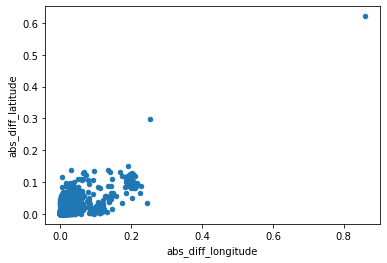

In [22]:
#Distribution of our subset travel vector
plot = train_df_new.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude') 

In [23]:
print('Old size: %d' % len(train_df_new))
train_df_new = train_df_new[(train_df_new.abs_diff_longitude < 5.0) & (train_df_new.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df_new))


Old size: 54253943
New size: 54253943


# Training the model

In [24]:
#Establish an input matrix for our linear model.
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))
train_X = get_input_matrix(train_df_new)
train_Y = np.array(train_df_new['fare_amount'])

print(train_X.shape)
print(train_Y.shape)

(54253943, 3)
(54253943,)


In [25]:
# We seek to find the optimal weight column using the Ordinary Least Squares -numpy used.
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_Y)
print(w_OLS)

[167.37400529 117.03581653   5.00922103]


# Evaluating the model using the test set



In [26]:
testing_df = pd.read_csv('../data science project/test.csv')
testing_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [27]:
# We need to generate the input matrix by adding our features to the above helper functions.
add_travel_vector_features(testing_df)
X_test = get_input_matrix(testing_df)


#Proceed to make predictions of the fare_amount on the test set based on our model (weight column) developed using the training set
Y_test_predictions = np.matmul(X_test,w_OLS).round(decimals = 2)

#We can load our predictions as csv files
load=pd.DataFrame({'key': testing_df.index, 'fare_amount': Y_test_predictions},
    columns = ['key', 'fare_amount'])
load.to_csv('load.csv', index = False)

print(os.listdir('.'))

['.ipynb_checkpoints', 'GCP-Coupons-Instructions.rtf', 'load.csv', 'nyc_taxi_data_raw.feather', 'sample_submission.csv', 'Taxi Fare Prediction.ipynb', 'test.csv', 'train.csv']
